In [ ]:

!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 89.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import Counter
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

**Importing some important libraries...**

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Reading Training Dataset**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Doceree-Complete-DataSet/Doceree_Complete_DataSet/Doceree-HCP_Train.csv",encoding='latin1')

In [ ]:
data.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         107578 non-null  object 
 6   USERZIPCODE      109345 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 12.2+ MB


**Information about Dataset**

In [ ]:
print("Dataset dimensions: ", data.shape)

Dataset dimensions:  (113937, 14)


In [ ]:
data.describe()

,ID,PLATFORM_ID,USERZIPCODE,IS_HCP
count,113937.000000,113937.000000,1.093450e+05,113936.000000
mean,57969.000000,3.574993,1.830240e+07,0.299993
std,32890.923148,2.569019,1.066908e+08,0.458257
min,1001.000000,1.000000,6.020000e+02,0.000000
25%,29485.000000,2.000000,1.935500e+04,0.000000
50%,57969.000000,2.000000,4.321000e+04,0.000000
75%,86453.000000,6.000000,7.709000e+04,1.000000
max,114937.000000,16.000000,9.970149e+08,1.000000


In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE         4592
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81624
IS_HCP                 1
dtype: int64


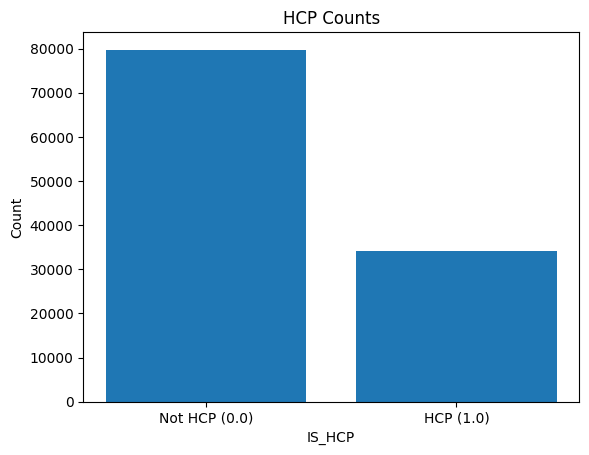

In [ ]:
hcp_counts = data['IS_HCP'].value_counts()
labels = ['Not HCP (0.0)', 'HCP (1.0)']
plt.bar(labels, hcp_counts)
plt.xlabel('IS_HCP')
plt.ylabel('Count')
plt.title('HCP Counts')
plt.show()

In [ ]:
data.nunique()

ID                 113937
DEVICETYPE              4
PLATFORM_ID            15
BIDREQUESTIP        33664
USERPLATFORMUID     53780
USERCITY             4420
USERZIPCODE         11278
USERAGENT            4288
PLATFORMTYPE            5
CHANNELTYPE             1
URL                  5231
KEYWORDS             2460
TAXONOMY              207
IS_HCP                  2
dtype: int64

In [ ]:
data.shape

(113936, 2)

In [ ]:
data.ndim

2

**Drop Null Values**

In [ ]:
# Drop null values from the target variable
data.dropna(subset=['IS_HCP'], inplace=True)

# Drop every column except the KEYWORDS column
data = data[['KEYWORDS', 'IS_HCP']]

**Selecting important features for training model**

In [ ]:
data.KEYWORDS

0         General|Endocrine|False|Medicine|Surgery|Urolo...
1         Bone Marrow|Radiography|Chronic|Oncology|Psych...
2         General|Endocrine|False|Medicine|Surgery|Urolo...
3         Dental|Total|Clinical|Pharmacology|Physicians|...
4         Critical Care|Emergency Medicine|General Pract...
                                ...                        
113932    Cardiovascular|Clinical|False|Male|Oncology|Ps...
113933    Asthma|Arthritis|General|Clinical|Diagnosis|Rh...
113934    Rehabilitation|Transplantation|Clinical|Preven...
113935    pain|disease|autoimmune|multiple sclerosis|gra...
113936    Genetic|Large|Autoimmune|Health|False|Abortion...
Name: KEYWORDS, Length: 113936, dtype: object

In [ ]:
# Assuming you have your original data stored in a DataFrame called 'df'
# Create a list of unique keywords from the KEYWORDS column
unique_keywords = set()
for keywords in data['KEYWORDS']:
    unique_keywords.update(keywords.split('|'))

In [ ]:
unique_keywords

{'',
 'Patient-Controlled',
 'inotuzumab ozogamicin',
 'molecular pathology',
 'cns infections',
 'fatigue',
 'subarachnoid hemorrhage',
 'orthodontics',
 'Neuromuscular Blockade',
 'cerebrovascular disorders',
 'Primary Prevention',
 'laryngitis',
 'neurocysticercosis',
 'health education',
 'Arthritis',
 'Premature',
 'premedication',
 'zostavax',
 'B-Lymphocytes',
 'venous thromboembolism',
 'Organ Transplantation',
 'meningitis',
 'pain',
 'biomarkers',
 'stroke',
 'airway obstruction',
 'family medicine',
 'peripheral arterial disease',
 'penciclovir',
 'hemopneumothorax',
 'Obstetrics & Gynecology',
 'porphyrias',
 'Anticoagulant Drug',
 'chemoprophylaxis',
 'macrolides',
 'Anetoderma',
 'lung injury',
 'keratitis',
 'Bradycardia',
 'dermabrasion',
 'corrective',
 'hemorrhagic disorders',
 'pharmacist',
 'muscle relaxation',
 'Postoperative Complications',
 'Cardiovascular',
 'reperfusion',
 'Cellulitis',
 'total',
 'ruptured',
 'arthralgia',
 'immunoglobulin g',
 'glycated hemog

**Creating new dataset from existing data set**

In [ ]:
# Create a new DataFrame to store the modified data
new_df = pd.concat([data] + [data['KEYWORDS'].str.get_dummies(sep='|').add_prefix('Keyword_')], axis=1)

# Drop the original KEYWORDS column
new_df.drop('KEYWORDS', axis=1, inplace=True)

In [ ]:
new_df.shape

(113936, 1614)

In [ ]:
new_df

,IS_HCP,Keyword_Ablation Techniques,Keyword_Abortion,Keyword_Abscess,Keyword_Acid-Base Imbalance,Keyword_Acquired,Keyword_Activated Protein C Resistance,Keyword_Activities of Daily Living,Keyword_Adaptation,Keyword_Adrenal Hyperplasia,...,Keyword_wheezing,Keyword_whipple disease,Keyword_whole genome sequencing,Keyword_whooping cough,Keyword_wound infection,Keyword_yaws,Keyword_yellow fever,Keyword_zoonoses,Keyword_zostavax,Keyword_zoster sine herpete
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113933,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113934,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113935,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df.isnull().sum()

IS_HCP                         0
Keyword_Ablation Techniques    0
Keyword_Abortion               0
Keyword_Abscess                0
Keyword_Acid-Base Imbalance    0
                              ..
Keyword_yaws                   0
Keyword_yellow fever           0
Keyword_zoonoses               0
Keyword_zostavax               0
Keyword_zoster sine herpete    0
Length: 1614, dtype: int64

In [ ]:
# Assuming your target variable is stored in a Series called 'target'
target = new_df['IS_HCP']

In [ ]:
target.shape

(113936,)

In [ ]:
new_df.drop('IS_HCP', axis=1, inplace=True)

In [ ]:
new_df.shape

(113936, 1613)

**Training model with train dataset features**

In [ ]:
import tensorflow as tf

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df, target, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(79755, 1613)
(34181, 1613)
(79755,)
(34181,)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
with tf.device('/gpu:0'):
  # Fit the model to the training data
  model.fit(x_train, y_train)

In [ ]:
y_predict = model.predict(x_test)
type(y_predict)

numpy.ndarray

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9896726251426231


**Reading Test Dataset**

In [ ]:
data_test=pd.read_csv("/content/drive/MyDrive/Doceree-Complete-DataSet/Doceree_Complete_DataSet/Doceree-HCP_Test.csv",encoding='latin1')

In [ ]:
data_test


,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...
...,...,...,...,...,...,...,...,...,...,...,...,...
28488,143989,Desktop,2,69.202.233.241,78ce4bbe-3885-4c14-b945-a0ea1e4574f4,Brooklyn,11215.0,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/news/...,Transplantation|Psychiatry|Heart Failure|Angio...
28489,143990,Desktop,7,75.4.190.65,a53799e1-b279-40cf-b467-11b4d659e325,Miami,33178.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cureus.com/publish/articles/144818...,small|hospitals|nephrology|emergency medicine|...
28490,143991,Desktop,7,137.52.180.45,acc732a8-2ee9-4e2c-9933-70e34db48101,Fort Lauderdale,33314.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/registrations/continue?...,small|hospitals|nephrology|emergency medicine|...
28491,143992,Desktop,8,66.249.66.4,dce21294-b105-4abb-b145-4e62d71def44,NaN,NaN,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,Online Medical Journal,Website,https://radrounds.com/radiology-case-images-te...,the|disease|pain|radiology|lung abscess|dyspar...


In [ ]:
data_test.isnull().sum()

ID                    0
DEVICETYPE            0
PLATFORM_ID           0
BIDREQUESTIP          0
USERPLATFORMUID       0
USERCITY           1559
USERZIPCODE        1115
USERAGENT             1
PLATFORMTYPE          0
CHANNELTYPE           0
URL                   0
KEYWORDS              0
dtype: int64

In [ ]:
data_test=data_test[['ID','KEYWORDS']]

In [ ]:
data_test.KEYWORDS

0        Family Practice|Drainage|Clinical|Dermatology|...
1        General|Clinical|Operative|Medicine|Cardiology...
2        Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3        Health|Male|Neurological Surgery|Otolaryngolog...
4        chronic kidney disease|pain|nephrology|disease...
                               ...                        
28488    Transplantation|Psychiatry|Heart Failure|Angio...
28489    small|hospitals|nephrology|emergency medicine|...
28490    small|hospitals|nephrology|emergency medicine|...
28491    the|disease|pain|radiology|lung abscess|dyspar...
28492    Medicine|General|Clinical|False|Urology|Total|...
Name: KEYWORDS, Length: 28493, dtype: object

**Selecting Important features from Test Dataset**

In [ ]:
new_test_data = pd.concat([data_test] + [data_test['KEYWORDS'].str.get_dummies(sep='|').add_prefix('Keyword_')], axis=1)
new_test_data.drop('KEYWORDS', axis=1, inplace=True)

In [ ]:
new_test_data.shape

(28493, 1427)

**Droping ID in seperate part**

In [ ]:
ID=new_test_data['ID']
ID.shape

(28493,)

In [ ]:
new_test_data.drop('ID', axis=1, inplace=True)

**Selection Common features for model fitting from both training and testing dataset**

In [ ]:
a=new_df.columns
print(a.shape)

b=new_test_data.columns
print(b.shape)

(1613,)
(1426,)


In [ ]:
c=a.intersection(b)
type(c)

pandas.core.indexes.base.Index

In [ ]:
c.shape


(1420,)

**Again training model with common features**

In [ ]:
new_df=new_df[c]

In [ ]:
new_df.shape

(113936, 1420)

**Spliting the training Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df, target, test_size=0.1, random_state=0)



In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
with tf.device('/gpu:0'):
  # Fit the model to the training data
  model.fit(x_train, y_train)

In [ ]:
y_predict = model.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9919255748639635


**Using given test data for predicting output file**

In [ ]:
new_test_data=new_test_data[c]
new_test_data.shape

(28493, 1420)

In [ ]:
y_predict_test=model.predict(new_test_data)
y_predict_test

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
type(ID)

pandas.core.series.Series

In [ ]:
type(y_predict_test)
IS_HCP=pd.Series(y_predict_test)
type(IS_HCP)

pandas.core.series.Series

In [ ]:
out=pd.concat([ID,IS_HCP],axis=1)

In [ ]:
out

,ID,0
0,115501,0.0
1,115502,1.0
2,115503,0.0
3,115504,0.0
4,115505,1.0
...,...,...
28488,143989,0.0
28489,143990,0.0
28490,143991,0.0
28491,143992,0.0


In [ ]:
out.rename(columns={0:'IS_HCP'},inplace=True)

**Saving the predicting file in Into "ans.csv"**

In [ ]:
out.to_csv('ans.csv',index=False)
